In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import seaborn as sns
import os
import pandas as pd
from joblib import dump, load
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings('ignore')

## Data Pre-Processing and EDA

In [9]:
data_set_init = pd.read_csv("Speed_Dating_Data.csv", encoding="ISO-8859-1")

In [10]:
data_set_init.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [11]:
data_set_init.shape

(8378, 195)

In [12]:
data_set_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [15]:
data_set_select = data_set_init[["iid", "pid", "gender", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "match"]]

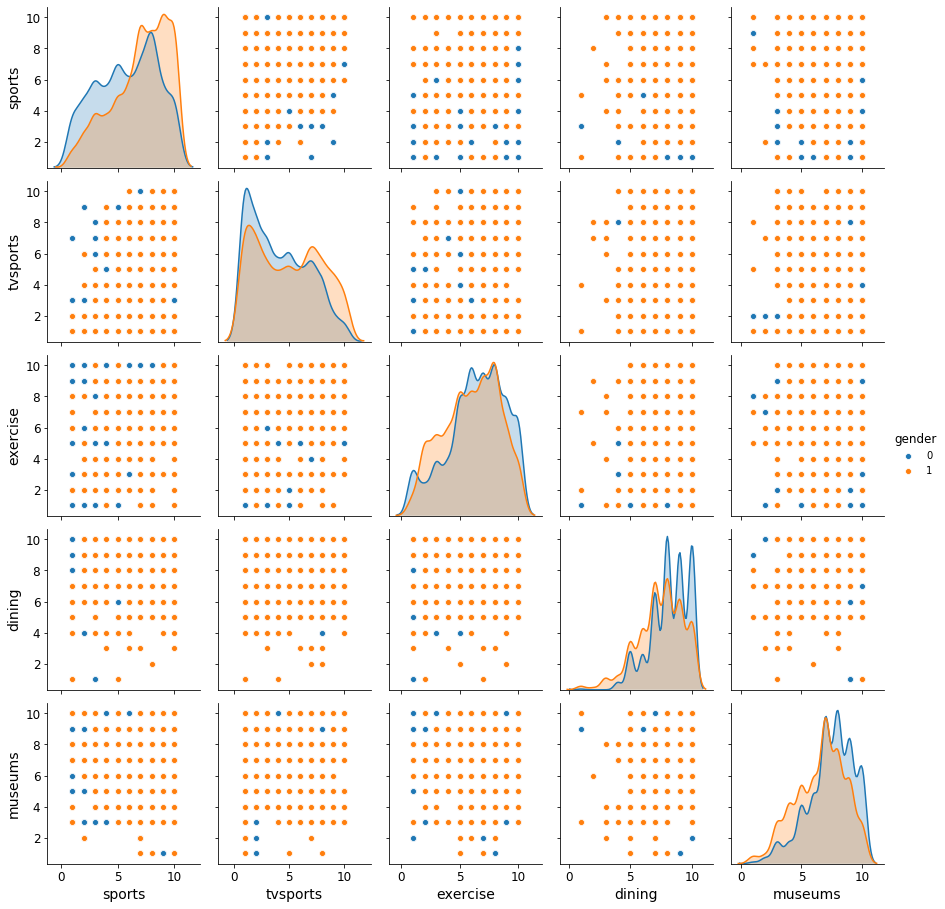

In [35]:
temp = pd.concat([data_set_select.iloc[:, 2], data_set_select.iloc[:, 3:8]], axis = 1)
g = sns.pairplot(temp, hue="gender")

In [ ]:
temp = pd.concat([data_set_select.iloc[:, 2], data_set_select.iloc[:, 9:9]], axis = 1)
g = sns.pairplot(temp, hue="gender")

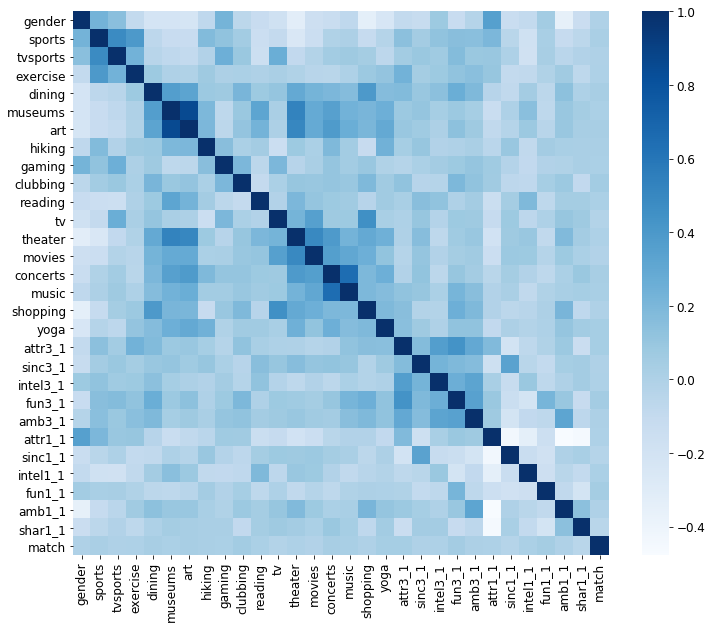

In [27]:
plt.figure(figsize=(12,10))
cor = data_set_select.corr()
sns.heatmap(cor.iloc[2:,2:], annot=False, cmap=plt.cm.Blues)
plt.show()

In [36]:
data_set_select = data_set_select.dropna(axis=0)

In [37]:
data_set_select.shape

(8223, 32)

In [38]:
df_man = pd.DataFrame()
df_woman = pd.DataFrame()

In [39]:
for i in range(len(data_set_select.index)):
    self = data_set_select.iloc[[i]]
    if int(self["gender"]) == 1:
        match = data_set_select[data_set_select["iid"] == int(self["pid"])]
        match = match[match["pid"] == int(self["iid"])]
        if len(match.index) != 0:
            other = match.iloc[[0]]
            df_man = df_man.append(self, ignore_index = True)
            df_woman = df_woman.append(other, ignore_index = True)

In [40]:
df_y = df_man["match"]

In [41]:
df_y

0       0
1       0
2       0
3       0
4       0
       ..
4034    0
4035    0
4036    0
4037    0
4038    0
Name: match, Length: 4039, dtype: int64

In [42]:
df_man = df_man.drop(["iid", "pid", "gender", "match"], axis=1)

In [43]:
df_woman = df_woman.drop(["iid", "pid", "gender", "match"], axis=1)

In [45]:
df_combined = pd.concat([df_man, df_woman], axis = 1, ignore_index=True)

In [46]:
df_combined.columns = ["sports_man", "tvsports_man", "exercise_man", "dining_man", "museums_man", "art_man", "hiking_man", "gaming_man", "clubbing_man", "reading_man", "tv_man", "theater_man", "movies_man", "concerts_man", "music_man", "shopping_man", "yoga_man", "attr3_1_man", "sinc3_1_man", "intel3_1_man", "fun3_1_man", "amb3_1_man", "attr1_1_man", "sinc1_1_man", "intel1_1_man", "fun1_1_man", "amb1_1_man", "shar1_1_man", "sports_woman", "tvsports_woman", "exercise_woman", "dining_woman", "museums_woman", "art_woman", "hiking_woman", "gaming_woman", "clubbing_woman", "reading_woman", "tv_woman", "theater_woman", "movies_woman", "concerts_woman", "music_woman", "shopping_woman", "yoga_woman", "attr3_1_woman", "sinc3_1_woman", "intel3_1_woman", "fun3_1_woman", "amb3_1_woman", "attr1_1_woman", "sinc1_1_woman", "intel1_1_woman", "fun1_1_woman", "amb1_1_woman", "shar1_1_woman"]

In [47]:
df_x = df_combined

In [48]:
df_combined = pd.concat([df_combined, df_y], axis = 1)

## Visualize Data

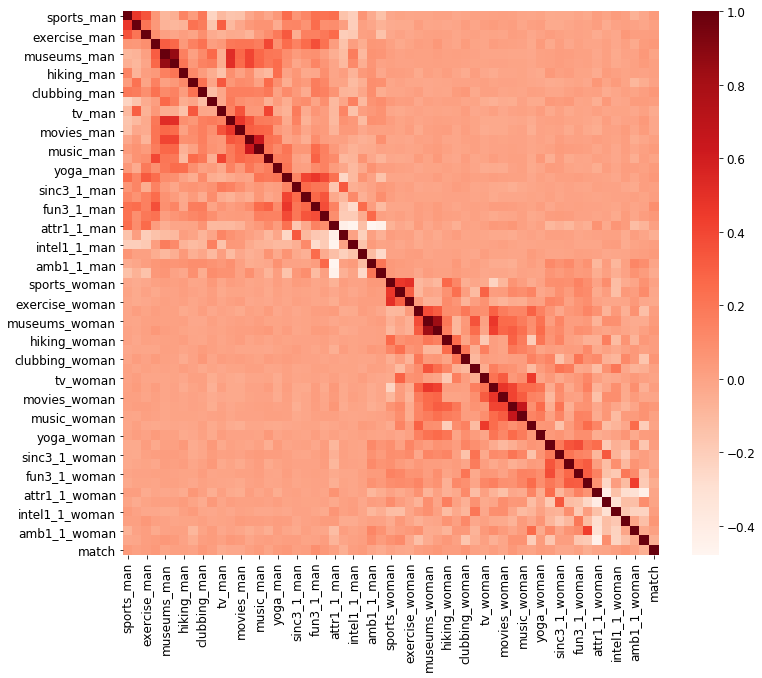

In [49]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_combined.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

## Data Processing

In [27]:
df_x.to_csv('df_x.csv')

In [28]:
df_y.to_csv('df_y.csv')

### SMOTE (Done on Kaggle instead)

In [33]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [34]:
try:
    # See #1137: this allows compatibility for scikit-learn >= 0.24
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing as safe_indexing

In [174]:
#from imblearn.over_sampling import SMOTE
#sm=SMOTE(random_state=42)

In [175]:
#X_final_smote,y_final=sm.fit_resample(df_x,df_y)

In [ ]:
len(y_final[y_final==1])/len(y_final)

In [ ]:
len(y_final)

In [50]:
X_final = pd.read_csv("X_final.csv", encoding="ISO-8859-1")
y_final = pd.read_csv("y_final.csv", encoding="ISO-8859-1")
X_final = X_final.drop(["Unnamed: 0"], axis =1)
y_final = y_final.drop(["Unnamed: 0"], axis =1)

In [51]:
X_final

,sports_man,tvsports_man,exercise_man,dining_man,museums_man,art_man,hiking_man,gaming_man,clubbing_man,reading_man,...,sinc3_1_woman,intel3_1_woman,fun3_1_woman,amb3_1_woman,attr1_1_woman,sinc1_1_woman,intel1_1_woman,fun1_1_woman,amb1_1_woman,shar1_1_woman
0,8.0,7.000000,2.0,6.000000,7.000000,5.000000,5.000000,5.000000,4.0,9.000000,...,8.000000,8.000000,8.000000,7.000000,15.000000,20.000000,20.000000,15.000000,15.000000,15.000000
1,8.0,7.000000,2.0,6.000000,7.000000,5.000000,5.000000,5.000000,4.0,9.000000,...,5.000000,8.000000,10.000000,3.000000,45.000000,5.000000,25.000000,20.000000,0.000000,5.000000
2,8.0,7.000000,2.0,6.000000,7.000000,5.000000,5.000000,5.000000,4.0,9.000000,...,9.000000,9.000000,8.000000,8.000000,35.000000,10.000000,35.000000,10.000000,10.000000,0.000000
3,8.0,7.000000,2.0,6.000000,7.000000,5.000000,5.000000,5.000000,4.0,9.000000,...,8.000000,7.000000,9.000000,8.000000,20.000000,20.000000,20.000000,20.000000,10.000000,10.000000
4,8.0,7.000000,2.0,6.000000,7.000000,5.000000,5.000000,5.000000,4.0,9.000000,...,3.000000,10.000000,6.000000,8.000000,20.000000,5.000000,25.000000,25.000000,10.000000,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6761,10.0,10.000000,10.0,10.000000,5.000000,5.000000,6.000000,7.000000,9.0,8.000000,...,7.169504,8.491488,8.339008,5.678016,10.847520,23.304959,19.152480,27.542561,5.847520,13.304959
6762,7.0,2.000000,6.0,7.000000,7.000000,7.000000,5.000000,5.000000,5.0,8.000000,...,5.898050,7.050975,9.898050,7.050975,19.443864,10.416974,20.370587,29.397477,10.416974,9.953613
6763,2.0,2.147413,2.0,9.617529,8.470116,8.087646,2.147413,4.677296,2.0,9.617529,...,8.764942,8.000000,6.087646,8.000000,10.000000,21.912354,20.000000,10.000000,20.000000,18.087646
6764,9.0,9.000000,9.0,8.000000,7.000000,6.000000,7.000000,7.000000,9.0,9.000000,...,9.792217,8.207783,6.623350,9.000000,15.150257,18.545858,18.545858,17.048569,17.048569,13.660890


In [52]:
y_final = np.array(y_final)

# Training & Testing

## Logistic Regression

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(test_size=0.2,random_state=42)

In [54]:
for train_index, test_index in sss.split(X_final,y_final):
    X_train,X_test=X_final.iloc[train_index],X_final.iloc[test_index]
    y_train,y_test=y_final[train_index],y_final[test_index]

In [55]:
len(X_train), len(y_train)

(5412, 5412)

In [56]:
len(X_test), len(y_test)

(1354, 1354)

In [57]:
X_train=X_train.reset_index()
X_train=X_train.drop(['index'],axis=1)
X_test=X_test.reset_index()
X_test=X_test.drop(['index'],axis=1)

In [58]:
X_train

,sports_man,tvsports_man,exercise_man,dining_man,museums_man,art_man,hiking_man,gaming_man,clubbing_man,reading_man,...,sinc3_1_woman,intel3_1_woman,fun3_1_woman,amb3_1_woman,attr1_1_woman,sinc1_1_woman,intel1_1_woman,fun1_1_woman,amb1_1_woman,shar1_1_woman
0,8.937349,6.093976,7.843373,7.062651,8.031325,7.031325,7.937349,7.000000,8.937349,7.968675,...,8.031325,8.000000,8.031325,8.000000,14.843373,30.000000,29.686746,10.156627,10.156627,5.156627
1,9.000000,3.000000,5.000000,7.000000,9.000000,10.000000,7.000000,3.000000,7.000000,5.000000,...,8.000000,10.000000,9.000000,7.000000,16.000000,20.000000,18.000000,20.000000,18.000000,8.000000
2,7.000000,3.000000,4.000000,5.000000,6.000000,7.000000,3.000000,2.000000,5.000000,7.000000,...,9.000000,7.905627,8.452814,5.641559,12.264069,20.000000,17.264069,20.000000,13.207794,17.264069
3,7.000000,7.000000,6.000000,9.000000,9.000000,8.000000,6.000000,4.000000,5.000000,8.000000,...,9.000000,10.000000,8.000000,8.000000,14.000000,20.000000,20.000000,14.000000,18.000000,14.000000
4,7.000000,2.000000,8.000000,10.000000,10.000000,10.000000,6.000000,1.000000,2.000000,10.000000,...,9.000000,8.109943,7.329829,4.439772,19.450285,20.000000,24.450285,19.450285,6.099430,10.549715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,8.000000,8.000000,9.000000,8.000000,...,7.000000,9.000000,7.000000,8.000000,15.000000,3.000000,50.000000,20.000000,2.000000,10.000000
5408,4.000000,1.000000,2.000000,10.000000,7.000000,7.000000,9.000000,9.000000,8.000000,7.000000,...,9.000000,9.000000,9.000000,7.000000,35.000000,0.000000,35.000000,10.000000,10.000000,10.000000
5409,9.000000,2.470119,5.000000,7.000000,6.529881,7.589644,7.059763,2.410356,5.470119,9.000000,...,9.529881,8.529881,8.470119,6.880475,8.410356,37.350594,15.298813,20.000000,7.350594,11.589644
5410,2.000000,1.000000,5.000000,7.000000,2.000000,2.000000,9.000000,6.000000,4.000000,10.000000,...,10.000000,9.000000,10.000000,10.000000,25.000000,20.000000,25.000000,25.000000,5.000000,0.000000


In [60]:
y_train = np.array(y_train)

In [61]:
y_test = np.array(y_test)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
cv_LR_params={'C':[0.00001, 0.001, 0.1, 1, 10, 100, 1000],#smaller values specify stronger regularization.
             'max_iter':[30,50,70,100,200,300,500], #how many rounds...
             'tol':[1e-6,1e-5,1e-4]#lower value permits the algorithm to fully converge
             }
ind_LR_params={'penalty':'l2','random_state':42,'solver':'saga','n_jobs':-1}
optimized_LR=GridSearchCV(LogisticRegression(**ind_LR_params),
                         cv_LR_params,scoring='accuracy',cv=5,n_jobs=-1) 
#147 iterations, start at 10:30 pm, finished before 7:00am

In [56]:
optimized_LR.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(n_jobs=-1, random_state=42,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [1e-05, 0.001, 0.1, 1, 10, 100, 1000],
                         'max_iter': [30, 50, 70, 100, 200, 300, 500],
                         'tol': [1e-06, 1e-05, 0.0001]},
             scoring='accuracy')

In [57]:
optimized_LR.best_params_

{'C': 1, 'max_iter': 100, 'tol': 1e-06}

In [80]:
# best parameters.
final_LR=LogisticRegression(penalty='l2',random_state=42,solver='saga',C=1,max_iter=100,tol=1e-06,n_jobs=-1)

In [81]:
final_LR.fit(X_train,y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=42, solver='saga', tol=1e-06)

## Logistic Regression Test

In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(final_LR,X_train,y_train,scoring="accuracy",n_jobs=-1,cv=10)

array([0.61808118, 0.62546125, 0.60443623, 0.61922366, 0.61182994,
       0.60628466, 0.6155268 , 0.59334566, 0.62661738, 0.63955638])

In [83]:
accuracy_LR=np.sum([0.63054187, 0.59441708, 0.65353038, 0.60098522, 0.66174056,
       0.61412151, 0.61247947, 0.66009852, 0.62889984, 0.58881579])/10
accuracy_LR

0.624563024

In [84]:
from sklearn.metrics import accuracy_score,precision_score
y_pred_LR=final_LR.predict(X_test)

In [85]:
y_pred_prob_LR = final_LR.predict_proba(X_test)

In [86]:
accuracy_score(y_test,y_pred_LR)

0.6395864106351551

In [87]:
y_pred_LR

array([1, 0, 0, ..., 1, 0, 1])

In [88]:
y_pred_prob_LR

array([[0.34823389, 0.65176611],
       [0.59061468, 0.40938532],
       [0.50330242, 0.49669758],
       ...,
       [0.37496823, 0.62503177],
       [0.65718343, 0.34281657],
       [0.25907571, 0.74092429]])

In [89]:
from joblib import dump, load
dump(final_LR, 'LR_1.joblib') 

['LR_1.joblib']

In [90]:
precision_score(y_test,y_pred_LR)

0.6383601756954612

In [91]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_LR)

0.6440177252584933

In [92]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_LR)

0.6411764705882353

## SVM

In [105]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
cv_SVC_params={'C':[0.1, 0.3, 0.7, 1, 3, 7, 10, 30, 70, 100, 300, 700, 1000]}
ind_SVC_params ={}
optimized_SVC=GridSearchCV(SVC(**ind_SVC_params),
                         cv_SVC_params,scoring='accuracy',cv=5,n_jobs=-1) 

In [106]:
optimized_SVC.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.7, 1, 3, 7, 10, 30, 70, 100, 300,
                               700, 1000]},
             scoring='accuracy')

In [107]:
optimized_SVC.best_params_    # but overfitting

{'C': 700}

In [120]:
final_SVC=SVC(C=2)

In [121]:
final_SVC.fit(X_train,y_train)

SVC(C=2)

## SVM Test

In [122]:
y_pred_SVC=final_SVC.predict(X_test)

In [123]:
y_pred_SVC_train=final_SVC.predict(X_train)

In [124]:
accuracy_score(y_train,y_pred_SVC_train)

0.8141167775314117

In [125]:
accuracy_score(y_test,y_pred_SVC)

0.7880354505169868

## Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

cv_params_RF={
    'n_estimators':randint(low=10,high=300),
    'max_depth':randint(low=2,high=13),
    'min_samples_split':randint(low=2, high=15),
    'min_samples_leaf':randint(low=2,high=10),
    'max_features':randint(low=3,high=30), #total of 160
    #'min_weight_fraction_leaf': It's a bit redundant with min_samples_leaf if the sample weights are not provided,
    # and since the data set is already balanced, no need ofr class_weight
    'min_impurity_decrease':[0,0.0001, 0.0001,0.001,0.005]
    #'max_leaf_nodes': this is the same as max_depth no use...
 }

ind_params_RF={'n_jobs':-1,'random_state':42}
RSCV_RF=RandomizedSearchCV(RandomForestClassifier(**ind_params_RF),
                           cv_params_RF,n_iter=100,cv=5,scoring='accuracy',n_jobs=-1)
RSCV_RF.fit(X_train,y_train)
#5 hours for 40 iterations, 14 hours for 80 iterations,l25 in 22 hours but a bit conservative let's say 100
#start at 5 pm. finished after 10 pm the next day... before 9 a.m. the next next day

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f4800c950>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8ef8035e10>,
                                        'min_impurity_decrease': [0, 0.0001,
                                                                  0.0001, 0.001,
                                                                  0.005],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f889064d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8fb945a1d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen o

In [164]:
RSCV_RF.best_params_

{'max_depth': 12,
 'max_features': 12,
 'min_impurity_decrease': 0.0001,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 71}

In [165]:
RSCV_RF.best_score_

0.8980022290379124

## Random Forest Test

In [166]:
final_RF=RandomForestClassifier(n_estimators=71,max_depth=12,min_samples_split=3,
                                min_samples_leaf=3,max_features=12,min_impurity_decrease=0.0001,oob_score=True,n_jobs=-1)
final_RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features=12,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=71, n_jobs=-1,
                       oob_score=True)

In [167]:
final_RF.oob_score_

0.8961566888396156

In [168]:
y_pred_RF=final_RF.predict(X_test)
y_proba_RF=final_RF.predict_proba(X_test)

In [169]:
y_pred_RF_train=final_RF.predict(X_train)

In [170]:
accuracy_score(y_train,y_pred_RF_train)

0.9691426459719142

In [171]:
accuracy_score(y_test,y_pred_RF)

0.9076809453471196

In [172]:
precision_score(y_test,y_pred_RF)

0.9169184290030211

In [173]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_RF)

0.896602658788774

In [176]:
f1_score(y_test,y_pred_RF)

0.9066467513069455

In [177]:
from joblib import dump, load
dump(final_RF, 'RF_Model.joblib') 

['RF_Model.joblib']